In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    """This function used to implement sigmoid function
    Input: x, an array_like object;
    Output: y, output."""
    y = 1 / (1 + np.exp(-z))
    return y

In [3]:
def softmax(x):
    c = np.max(x)
    y = np.exp(x - c) / np.sum(np.exp(x-c))
    return y

In [4]:
def cross_entropy_loss(y, l):
    # y is the output of network
    # l is the one-hot label
    loss = -np.sum(l * np.log(y + np.finfo(float).eps))
    return loss

In [5]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
   
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad

In [6]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, l):
        y = self.predict(x)
        return cross_entropy_loss(y, l)
    
    def accuracy(self, x, l):
        y = self.predict(x)
        p = np.argmax(y, axis=1)
        t = np.argmax(l, axis=1)
        accuracy = np.sum(p==t).astype(np.float) / x.shape[0]
        return accuracy
    
    def numerical_gradient(self, x, l):
        loss_W = lambda W: self.loss(x, l)        
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [7]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print('Shape of W1 is {}'.format(net.params['W1'].shape))
print('Shape of b1 is {}'.format(net.params['b1'].shape))
print('Shape of W2 is {}'.format(net.params['W2'].shape))
print('Shape of b2 is {}'.format(net.params['b2'].shape))

Shape of W1 is (784, 100)
Shape of b1 is (100,)
Shape of W2 is (100, 10)
Shape of b2 is (10,)


In [8]:
from dataset.mnist import load_mnist

In [9]:
[(x_train, l_train), (x_test, l_test)] = load_mnist(normalize=True, one_hot_label=True)

In [10]:
train_loss_list = []

In [11]:
items_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [12]:
import time

In [13]:
X = np.random.rand(100, 784)
Y = np.random.rand(100, 10)
time_in = time.time()
grad = network.numerical_gradient(X, Y)
time_out = time.time()
print(time_out - time_in)

63.210615396499634


In [14]:
loss = network.loss(X, Y)
print(loss)

3522.7451216555887


In [16]:
for i in range(items_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    l_batch = l_train[batch_mask]
    
    
    grad = network.numerical_gradient(x_batch, l_batch)
    
    for k in ('W1', 'b1', 'W2', 'b2'):
        network.params[k] -= learning_rate * grad[k]
        
    loss = network.loss(x_batch, l_batch)
    print('iter:{}'.format(i))
    print('loss={}'.format(loss))
    train_loss_list.append(loss)

iter:0
loss=2012.3517731196403
iter:1
loss=768.84811072764
iter:2
loss=773.1102345389975
iter:3
loss=728.4885021927302
iter:4
loss=726.7952456867556
iter:5
loss=720.6233697062437
iter:6
loss=692.4899913831784
iter:7
loss=690.3688056212133
iter:8
loss=685.0341858124743
iter:9
loss=686.4700557716412
iter:10
loss=688.6656330217604
iter:11
loss=687.5518905658182
iter:12
loss=688.3881030497579
iter:13
loss=687.4289033836549
iter:14
loss=683.6851473279362
iter:15
loss=687.556895016678
iter:16
loss=688.5356361412398
iter:17
loss=682.4389641376174
iter:18
loss=682.485785678384
iter:19
loss=690.8700322465209
iter:20
loss=680.1187002462179
iter:21
loss=688.7502934239062
iter:22
loss=685.5303216986151
iter:23
loss=689.0310400442224
iter:24
loss=689.6393538940556
iter:25
loss=683.7083131502266
iter:26
loss=686.6352703983061
iter:27
loss=682.1066095518711
iter:28
loss=690.2887617894302
iter:29
loss=688.1820409494801
iter:30
loss=689.1247704129701
iter:31
loss=686.0131262257337
iter:32
loss=688.6909

iter:261
loss=685.2217519613944
iter:262
loss=687.5423117484495
iter:263
loss=689.6976239078414
iter:264
loss=683.2615974168559
iter:265
loss=685.3261551251837
iter:266
loss=689.752372351199
iter:267
loss=684.6013503057904
iter:268
loss=688.6940106479205
iter:269
loss=685.0881622518473
iter:270
loss=687.00530167857
iter:271
loss=689.2369204425975
iter:272
loss=684.7396828157102
iter:273
loss=681.2951760212762
iter:274
loss=688.0324920703679
iter:275
loss=683.7738797124739
iter:276
loss=685.7629391579183
iter:277
loss=684.6664676090174
iter:278
loss=687.317477089915
iter:279
loss=682.5245477620713
iter:280
loss=690.0720239091688
iter:281
loss=685.6194630979501
iter:282
loss=686.1978890723103
iter:283
loss=688.0296294238533
iter:284
loss=688.2215863540255
iter:285
loss=683.8397100305244
iter:286
loss=686.4235340324869
iter:287
loss=689.1169652144874
iter:288
loss=686.4564737947442
iter:289
loss=685.9155191277739
iter:290
loss=684.2864593831057
iter:291
loss=687.2318545959802
iter:292
los

iter:519
loss=687.5558800801075
iter:520
loss=682.973935318656
iter:521
loss=688.5391137159577
iter:522
loss=688.0008521807849
iter:523
loss=686.3336366327906
iter:524
loss=688.9694137290992
iter:525
loss=687.6955178442095
iter:526
loss=680.2297508313417
iter:527
loss=686.2889916052396
iter:528
loss=685.7950090958357
iter:529
loss=688.872811935262
iter:530
loss=687.9760857790159
iter:531
loss=687.4679237425983
iter:532
loss=686.2119351101862
iter:533
loss=686.082940840646
iter:534
loss=685.2197441721007
iter:535
loss=688.5817364824773
iter:536
loss=683.3326577090206
iter:537
loss=685.7109370465732
iter:538
loss=684.4247065651422
iter:539
loss=688.5353890128533
iter:540
loss=687.6906257175395
iter:541
loss=685.5434213593244
iter:542
loss=688.038469817204
iter:543
loss=686.318045422682
iter:544
loss=688.0231566543969
iter:545
loss=687.4046852405484
iter:546
loss=687.5401281659445
iter:547
loss=687.7866358884605
iter:548
loss=684.7727856019773
iter:549
loss=688.541146523433
iter:550
loss=

iter:777
loss=688.3238609019149
iter:778
loss=688.6817849368338
iter:779
loss=682.336814501844
iter:780
loss=688.3638062021391
iter:781
loss=686.6645561113031
iter:782
loss=685.0814641074224
iter:783
loss=688.1628901755723
iter:784
loss=688.9511684063054
iter:785
loss=688.2977578713092
iter:786
loss=685.228341319446
iter:787
loss=684.8989897674285
iter:788
loss=686.5508284060152
iter:789
loss=687.2961504982288
iter:790
loss=688.1841667993081
iter:791
loss=688.8320880881294
iter:792
loss=685.5382325557202
iter:793
loss=688.2442428732676
iter:794
loss=685.0779693892118
iter:795
loss=689.1640849919493
iter:796
loss=687.2578603583338
iter:797
loss=685.839153276745
iter:798
loss=687.033771178532
iter:799
loss=684.1960009496661
iter:800
loss=689.3309635054202
iter:801
loss=687.8062200018708
iter:802
loss=686.2112016544531
iter:803
loss=683.637634837559
iter:804
loss=684.8503307140494
iter:805
loss=688.0081494678245
iter:806
loss=687.3821982618301
iter:807
loss=689.7884224840429
iter:808
loss

In [17]:
import matplotlib.pyplot as plt

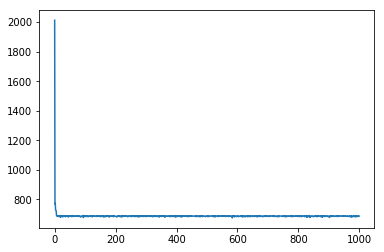

In [18]:
plt.plot(range(items_num), train_loss_list, label='train_loss')